In [ ]:
# Tushar Paul
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_path = '/content/drive/MyDrive/Face'

In [ ]:
import os
import shutil

# Define paths to source directory and destination directories for each category
source_dir = "/content/drive/MyDrive/Face"
destination_dir = "/content/drive/MyDrive/Face/Categorized"

# Create destination directories if they don't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# List all files in the source directory
files = os.listdir(source_dir)

# Define categories
categories = ['angry','disgust','neutral', 'surprise', 'happy', 'sad']

# Iterate over each file and move them to the corresponding category directory
for file in files:
    for category in categories:
        if category in file:
            category_dir = os.path.join(destination_dir, category)
            if not os.path.exists(category_dir):
                os.makedirs(category_dir)
            # Move the file to the category directory
            shutil.move(os.path.join(source_dir, file), category_dir)
            break  # Break the loop once the file is moved to its category directory


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import tensorflow as tf

# Define parameters
image_height = 224
image_width = 224
batch_size = 32

# Define data generator
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    validation_split=0.2  # Split data into training and validation sets
)

# Define path to dataset directory
dataset_dir = "/content/drive/MyDrive/Face/Categorized"

# Load training data
train_generator = data_generator.flow_from_directory(
    dataset_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',  # 'categorical' for multi-class classification
    subset='training'  # training data
)

# Load validation data
validation_generator = data_generator.flow_from_directory(
    dataset_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use validation data
)

# Print class indices
print("Class indices:", train_generator.class_indices)


Found 21556 images belonging to 7 classes.
Found 5385 images belonging to 7 classes.
Class indices: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [ ]:
# Define and compile CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=4,        # Increase epoch to increase accuracy & reduce losses
    validation_data=validation_generator
)

Epoch 1/4
674/674 [==============================] - 5285s 8s/step - loss: 1.6575 - accuracy: 0.3473 - val_loss: 1.5388 - val_accuracy: 0.4026
Epoch 2/4
674/674 [==============================] - 2654s 4s/step - loss: 1.4050 - accuracy: 0.4632 - val_loss: 1.4020 - val_accuracy: 0.4620
Epoch 3/4
674/674 [==============================] - 2679s 4s/step - loss: 1.2385 - accuracy: 0.5315 - val_loss: 1.3741 - val_accuracy: 0.4735
Epoch 4/4
439/674 [==================>...........] - ETA: 14:29 - loss: 1.0268 - accuracy: 0.6150

In [ ]:
# Define the path where want to save the model
model_save_path = "/content/drive/MyDrive/trained_model.h5"

# Save the model
model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

In [ ]:
from tensorflow.keras.models import load_model
# Load the saved model
loaded_model = load_model(model_save_path)

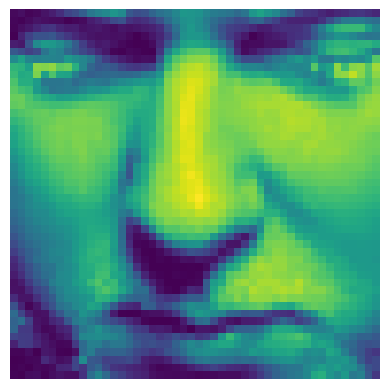

In [ ]:
limport matplotlib.pyplot as plt
import matplotlib.image as mpimg

#img_name = '2398.jpg'  # Replace 'example_image.jpg' with the name of your image file
img = mpimg.imread("/content/drive/MyDrive/Face/Categorized/sad/sad/2262.jpg")
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

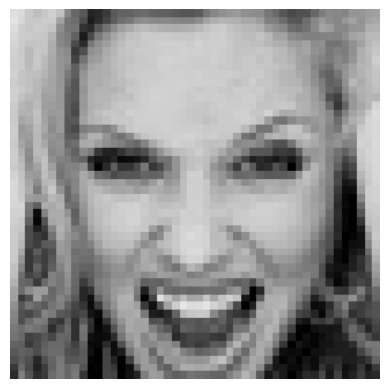

1/1 [==============================] - 0s 57ms/step
Predicted class: angry


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the path to the image you want to test
image_path = "/content/drive/MyDrive/Face/Categorized/angry/angry/10016.jpg"

# Load the image
img = image.load_img(image_path, target_size=(image_height, image_width))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize pixel values to [0, 1]

plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class_index = np.argmax(predictions[0])
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index]

print("Predicted class:", predicted_class)